# Example 1: Symbolic Regressor

In [1]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import pydotplus

Populating the interactive namespace from numpy and matplotlib


/home/trev/.virtualenvs/ve/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


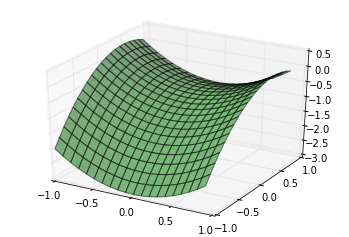

In [2]:
# Ground truth
x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [4]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13     386.19117972        7    0.33158080873   0.470286152255     50.71s
   1     9.91    1.66832489614        5   0.335361761359   0.488347149514     38.05s
   2     7.76      1.888657267        7   0.260765934398   0.565517599814     32.01s
   3     5.37    1.00018638338       17   0.223753461954   0.274920433701     27.98s
   4     4.69   0.878161643513       17     0.1450953226   0.158359554221     24.97s
   5      6.1    0.91987274474       11  0.0436125629701  0.0436125629701     22.60s
   6     7.18    1.09868887802       11  0.0436125629701  0.0436125629701     20.46s
   7     7.65    1.96650325011       11  0.0436125629701  0.0436125629701     18.54s
   8     8.02    1.02643443398       11  0.0436125629701  0.0436125629701  

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div'), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1)

In [5]:
print est_gp._program

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


In [6]:
est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

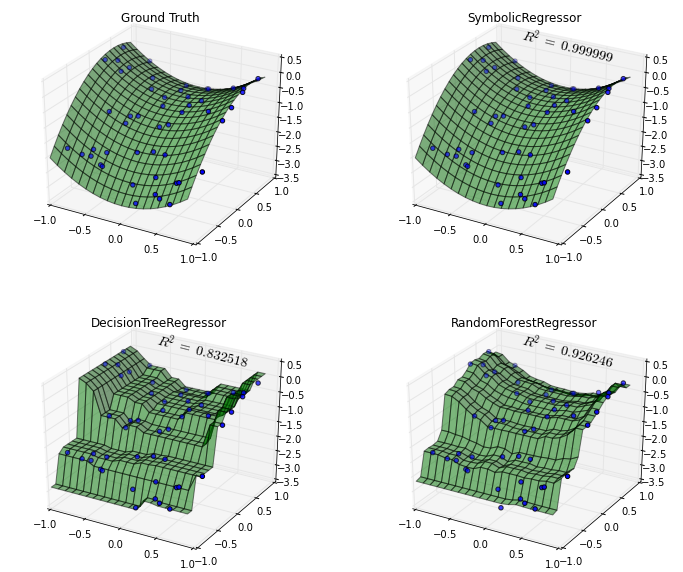

In [7]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()

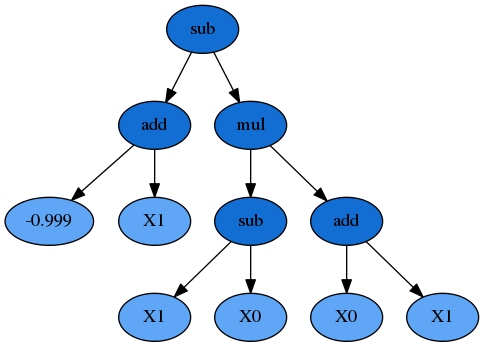

In [8]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

In [9]:
print est_gp._program.parents

{'donor_nodes': [0, 1, 2, 6], 'parent_idx': 374, 'parent_nodes': [1, 2, 3], 'method': 'Crossover', 'donor_idx': 116}


sub(-0.870, mul(add(-0.999, X1), X1))
Fitness: 0.314137741318


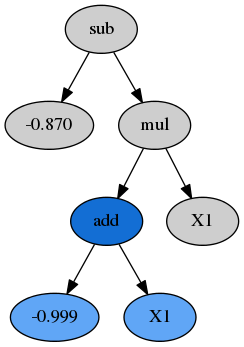

In [10]:
idx = est_gp._program.parents['donor_idx']
fade_nodes = est_gp._program.parents['donor_nodes']
print est_gp._programs[-2][idx]
print 'Fitness:', est_gp._programs[-2][idx].fitness_
graph = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

sub(add(-0.956, X1), mul(sub(X1, X0), add(X0, X1)))
Fitness: 0.15361256297


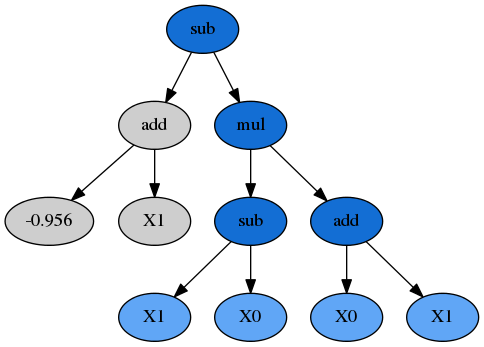

In [11]:
idx = est_gp._program.parents['parent_idx']
fade_nodes = est_gp._program.parents['parent_nodes']
print est_gp._programs[-2][idx]
print 'Fitness:', est_gp._programs[-2][idx].fitness_
graph = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

# Example 2: Symbolic Transformer

In [12]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state
from sklearn.datasets import load_boston
import numpy as np

In [13]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

In [14]:
from sklearn.linear_model import Ridge
est = Ridge()
est.fit(boston.data[:300, :], boston.target[:300])
print est.score(boston.data[300:, :], boston.target[300:])

0.759145222183


In [15]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(boston.data[:300, :], boston.target[:300])

gp_features = gp.transform(boston.data)
new_boston = np.hstack((boston.data, gp_features))

est = Ridge()
est.fit(new_boston[:300, :], boston.target[:300])
print
print est.score(new_boston[300:, :], boston.target[300:])

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.04   0.339498855737        3   0.827183303904   0.541134538986     15.39s
   1     6.76   0.595607349765        8   0.844142294401   0.573168891668     22.92s
   2     5.24   0.720496338383        8   0.837040776431   0.803783328827     26.87s
   3     5.42    0.73925734877        5   0.859489370651   0.580813223319     28.29s
   4     6.94   0.724145477149        5   0.851564721312   0.515829829967     28.58s
   5     8.75   0.706072480163       12   0.862081380781   0.464620353508     27.80s
   6     9.43    0.72277984526       18     0.8665540822   0.551898967312     26.82s
   7     9.81   0.728222217883        7   0.869930319583   0.694780730698     25.63s
   8    10.34   0.732589362714       12   0.869313590585   0.448107338283  

# Example 3: Customizing your programs

In [16]:
from gplearn.functions import make_function

In [17]:
def logic(x1, x2, x3, x4):
    return np.where(x1 > x2, x3, x4)

logical = make_function(function=logic,
                        name='logical',
                        arity=4)

In [18]:
function_set = ['add', 'sub', 'mul', 'div', logical]
gp = SymbolicTransformer(generations=2, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)

In [19]:
gp.fit(boston.data[:300, :], boston.target[:300])

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    55.28   0.295669391599        3   0.807806854954   0.752998560805      1.10s
   1    10.37   0.532043054645        7    0.81020058391    0.64870325782      0.00s


SymbolicTransformer(const_range=(-1.0, 1.0),
          function_set=['add', 'sub', 'mul', 'div', <gplearn.functions._Function object at 0x7f4e3bae1110>],
          generations=2, hall_of_fame=100, init_depth=(2, 6),
          init_method='half and half', max_samples=0.9, metric='pearson',
          n_components=10, n_jobs=3, p_crossover=0.9,
          p_hoist_mutation=0.01, p_point_mutation=0.01,
          p_point_replace=0.05, p_subtree_mutation=0.01,
          parsimony_coefficient=0.0005, population_size=2000,
          random_state=0, stopping_criteria=1.0, tournament_size=20,
          verbose=1)

In [20]:
print gp._programs[0][906]

sub(logical(X6, add(X11, 0.898), X10, X2), X5)


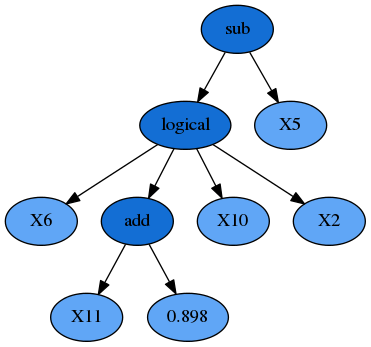

In [21]:
graph = gp._programs[0][906].export_graphviz()
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())